K NEARESR NEIGHBORS WITH PYTHON
Here we have classified dataset from company. They have hidden the feature columns but have data and target classes.
we'll try to use knn to create a model that predics a class for a new data
Let's grab it and use it!

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# READ THE DATASET

In [5]:
dataset=pd.read_csv('Classified Data.txt',index_col=0)

In [6]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [7]:
# SCALING THE DATA

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [12]:
scaler.fit(dataset.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features=scaler.transform(dataset.drop('TARGET CLASS',axis=1))

In [14]:
df_feat=pd.DataFrame(scaled_features,columns=dataset.columns[:-1])

In [15]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [16]:
# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,dataset['TARGET CLASS'],test_size=0.2,random_state=0)

In [20]:
# BUILD THE KNN MODEL

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
y_predict=knn.predict(x_test)

In [25]:
# MODEL PREDICTION AND EVALUATION

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
cm=confusion_matrix(y_test,y_predict)
accuracyscore=accuracy_score(y_test,y_predict)
classificationreport=classification_report(y_test,y_predict)

In [28]:
cm

array([[ 74,  12],
       [ 12, 102]], dtype=int64)

In [29]:
accuracyscore

0.88

In [31]:
print(classificationreport)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        86
           1       0.89      0.89      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



 Choosing the k value
Let's go ahead and use the elbow method to pick a good k vaue:

In [34]:
error_rate=[]
for i in range(1,40):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


In [35]:
# VISULIZE THE K VALUE AND ERROR RATE

<function matplotlib.pyplot.show(*args, **kw)>

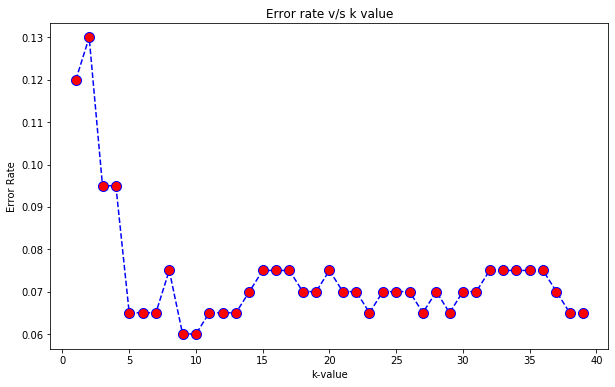

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate v/s k value')
plt.xlabel('k-value')
plt.ylabel('Error Rate')
plt.show

In [38]:
# now provide the k value
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)


In [39]:
cm=confusion_matrix(y_test,y_predict)
accuracyscore=accuracy_score(y_test,y_predict)
classificationreport=classification_report(y_test,y_predict)

In [40]:
cm

array([[ 76,  10],
       [  3, 111]], dtype=int64)

In [41]:
accuracyscore

0.935

In [43]:
print(classificationreport)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        86
           1       0.92      0.97      0.94       114

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200

